In [1]:
library(randomForest)
library(caret)
library(ggplot2)
library(Metrics)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice


Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




In [2]:
df <- read.csv("../../../Cleaned Datasets R/prices_cleaned.csv")

set.seed(42)

train_index <- createDataPartition(df$Price, p = 0.8, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [3]:
set.seed(42)

num_predictors <- length(names(train_data)) - 1
mtry_sqrt <- floor(sqrt(num_predictors))

model <- randomForest(Price ~ ., data = train_data, ntree = 150, 
            mtry = mtry_sqrt, nodesize=1, maxnodes=20, do.trace=TRUE)

print(model)
summary(model)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |   0.7275    72.80 |
   2 |   0.6797    68.02 |
   3 |   0.6889    68.94 |
   4 |   0.6399    64.04 |
   5 |   0.6151    61.55 |
   6 |    0.602    60.24 |
   7 |   0.5927    59.31 |
   8 |   0.5957    59.61 |
   9 |    0.602    60.24 |
  10 |    0.605    60.54 |
  11 |   0.6005    60.09 |
  12 |   0.5973    59.77 |
  13 |   0.5927    59.31 |
  14 |   0.5816    58.20 |
  15 |   0.5741    57.45 |
  16 |   0.5656    56.60 |
  17 |   0.5611    56.14 |
  18 |   0.5603    56.07 |
  19 |   0.5648    56.51 |
  20 |   0.5576    55.80 |
  21 |   0.5551    55.55 |
  22 |   0.5532    55.36 |
  23 |   0.5559    55.63 |
  24 |    0.551    55.13 |
  25 |   0.5445    54.49 |
  26 |   0.5408    54.12 |
  27 |    0.541    54.13 |
  28 |   0.5385    53.89 |
  29 |   0.5391    53.95 |
  30 |    0.542    54.24 |
  31 |   0.5436    54.40 |
  32 |   0.5473    54.76 |
  33 |    0.545    54.54 |
  34 |   0.5393    53.96 |
  35 |   0.5374    53.77 |
 

                Length Class  Mode     
call               8   -none- call     
type               1   -none- character
predicted       9449   -none- numeric  
mse              150   -none- numeric  
rsq              150   -none- numeric  
oob.times       9449   -none- numeric  
importance        15   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               9449   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [4]:
predictions <- predict(model, test_data)
actual <- test_data$Price

In [5]:
mae_value <- mae(actual, predictions)
print(paste("Mean Absolute Error:", mae_value))

mse_value <- mse(actual, predictions)
print(paste("Mean Squared Error:", mse_value))

rmse_value <- rmse(actual, predictions)
print(paste("Root Mean Squared Error:", rmse_value))

r_squared_value <- summary(lm(predictions ~ actual))$r.squared
print(paste("R-squared score:", r_squared_value))

[1] "Mean Absolute Error: 0.566473333642727"
[1] "Mean Squared Error: 0.51778261967267"
[1] "Root Mean Squared Error: 0.719571135936309"
[1] "R-squared score: 0.569697808846871"


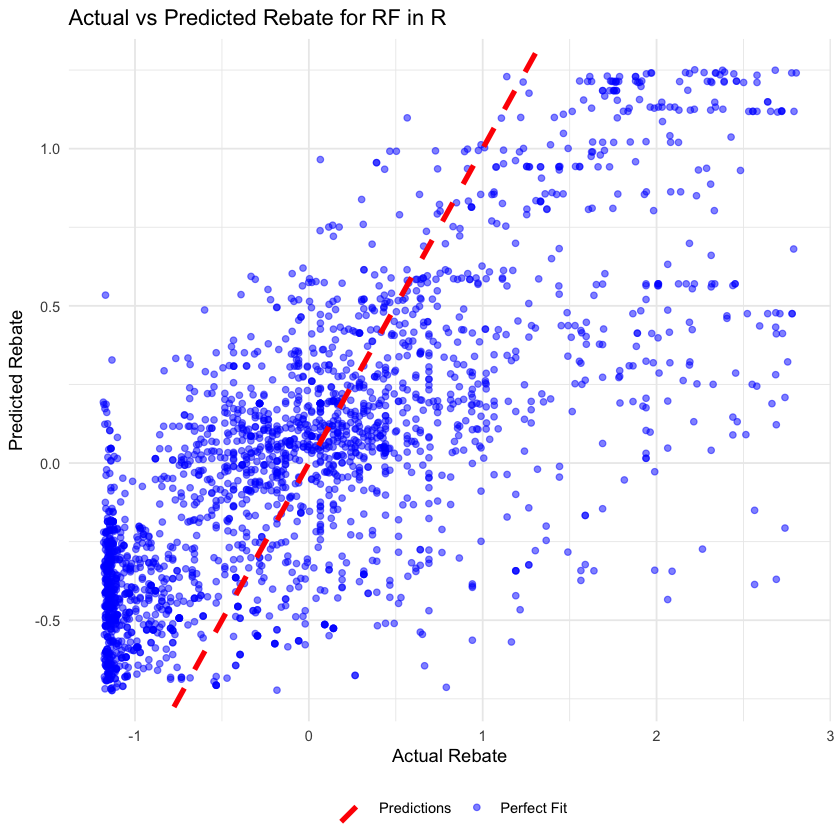

In [6]:
data_plot <- data.frame(
  Actual = actual,
  Predicted = predictions
)

p <- ggplot(data_plot, aes(x = Actual, y = Predicted)) +
  geom_point(aes(color = "Predictions"), alpha = 0.5) + 
  geom_abline(aes(color = "Perfect Fit", intercept = 0, slope = 1), linetype = "dashed", linewidth = 1.5) +
  scale_color_manual(values = c("Predictions" = "blue", "Perfect Fit" = "red"), name = "", labels = c("Predictions", "Perfect Fit")) +
  labs(title = "Actual vs Predicted Rebate for RF in R", 
       x = "Actual Rebate", 
       y = "Predicted Rebate") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(p)